# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import time
import datetime
import math
import numpy as np
import torch
                    
#For Plotting
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
from unityagents import UnityEnvironment

from dqn_agent import Agent, ReplayBuffer
from collections import deque

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [3]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

When finished, you can close the environment.

In [ ]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

Since we have already set the parameter values of the class Agent in the dqn_agent

```
 def __init__(self, state_size = 37, action_size = 4, seed = 1, fc1_units = 64, fc2_units = 64):
```

We will load the class Agent as:

```
agent = Agent()
```

### Deep Q-Network

In [6]:
agent = Agent()
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    
    #Initializing epsilon as 1.0
    eps = eps_start                    
    
    #Initializing a loop for episodes
    for i_episode in range(1, n_episodes+1):
        
        #Mentioned in the markdown, while training set it to equal
        env_info = env.reset(train_mode=True)[brain_name]
        
        #Asking the env to send the current state
        state = env_info.vector_observations[0]
        
        #Initializing the score to 0
        score = 0
        
        #Creating a loop for 1 to 1001 time steps, if time step limit is exceeded; it means the agent is stuck; break the lo
        for t in range(max_t):
            
            #Taking the action considering the epsilon value
            action = agent.act(state, eps)
            
            #Taking the action
            env_info = env.step(action)[brain_name]
            
            #Going to the next state
            next_state = env_info.vector_observations[0]
            
            #Receiving the reward on the basis of action
            reward = env_info.rewards[0]
            
            #Check if the episode has finished, if it is true then it has finished; otherwise episode still continuing.
            done = env_info.local_done[0]
            
            #Saving the experience in replay buffer
            agent.step(state, action, reward, next_state, done)
            
            #Adding the received reward to the score
            score += reward
            
            #Assigning the new state as current state; meaning changing the state
            state = next_state
            
            #Check if the episode has ended or not
            if done:
                
                #If true; then come out of this loop
                break 
                
        #A list to store the 100 most recent scores        
        scores_window.append(score)       
        
        #Negative or positive rewards are added to get score
        scores.append(score)
        
        # Condition to select the highest epsilon value
        # With each episode the epsilon value decreases by a factor of 0.995
        
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        

        print('\rEpisode {}\tAverage Score: {:.2f}'.format(
              i_episode, np.mean(scores_window)), end="")
        if i_episode % 50 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(
                  i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(
                  i_episode, np.mean(scores_window)))
            
            
            #Saving the file
            torch.save(agent.qnetwork_local.state_dict(), 'saved_weights.pth')
            break
    return scores

#To record time taken
starting_time = time.time()
scores = dqn()
ending_time = time.time()

time_taken = ending_time - starting_time
print("Time taken to converge is: {}".format(time_taken))

Episode 50	Average Score: 0.344
Episode 100	Average Score: 1.09
Episode 150	Average Score: 2.76
Episode 200	Average Score: 4.89
Episode 250	Average Score: 6.24
Episode 300	Average Score: 7.15
Episode 350	Average Score: 8.39
Episode 400	Average Score: 10.02
Episode 450	Average Score: 11.94
Episode 493	Average Score: 13.03
Environment solved in 493 episodes!	Average Score: 13.03
Time taken to converge is: 637.9585747718811


### Plotting the Values

In the following graph, Score is plotted against episodes.

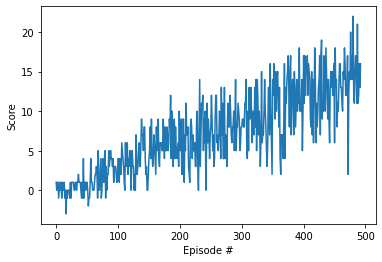

In [7]:
# train with current params
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Loading the Saved weights Model

In [6]:
agent = Agent()
agent.qnetwork_local.load_state_dict(torch.load('saved_weights.pth'))


In [7]:
#Resetting the environment; setting the training_mode to false
env_info = env.reset(train_mode=False)[brain_name] # reset the environment

state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    
#This time instead of selecting random action; we will use the trained weights to choose the right actions
    
    action = agent.act(state, eps=0.1)         # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))


Score: 14.0


In [8]:
env.close()